# Making some quick calculations to get $F_{ij}$ working for $C_l^{TT},C_l^{TE},C_l^{EE}$ observables

In [1]:
import crosspower as cp # branch quickCl
import FisherCl as fcl
import noiseCl as ncl
import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

"""
This notebook originally a copy of the TT TE EE version, April 13, 2018.

"""

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


'\nThis notebook originally a copy of the TT TE EE version, April 13, 2018.\n\n'

In [2]:
# set cosmological parameters

# maybe load a FisherMatrix object and get these from that instead?
"""
cosParams = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,
    
        'w'     : -1.0, # actually is w0 but CAMB calls it w
        'wa'    : 0.0,

        # if fiducial mnu is changed, need to adjust omch2 as well
        'mnu'   : 0.06, # (eV)
        #'mnu'   : 0.058, # Lloyd suggested this value for fiducial; adjust omch2 if I do use it
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1,
        'neutrino_hierarchy'      : 'normal'}

AccuracyBoost = 3
nonlinear = True
nz = 30000
print 'nonlinear = ',nonlinear
"""

"\ncosParams = {\n        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead\n        'cosmomc_theta'           : 1.04087e-2,\n        'ombh2' : 0.02226,\n        'omch2' : 0.1193,\n        'omk'   : 0,\n        'tau'   : 0.063,\n\n        'As'    : 2.130e-9,\n        'ns'    : 0.9653,\n        'r'     : 0,\n        'kPivot': 0.05,\n    \n        'w0'    : -1.0,\n        'wa'    : 0.0,\n\n        # if fiducial mnu is changed, need to adjust omch2 as well\n        'mnu'   : 0.06, # (eV)\n        #'mnu'   : 0.058, # Lloyd suggested this value for fiducial; adjust omch2 if I do use it\n        'nnu'   : 3.046,\n        'standard_neutrino_neff'  : 3.046,\n        'num_massive_neutrinos'   : 1,\n        'neutrino_hierarchy'      : 'normal'}\n\nAccuracyBoost = 3\nnonlinear = True\nnz = 30000\nprint 'nonlinear = ',nonlinear\n"

# Load a saved FisherMatrix object for parameters and structure

In [3]:
# load saved Fobj
# get lensing and galaxy Fisher matrix to add

#"""
import pickle

# these two have an additional parameter wa but not crossClsPlus,Minus for it, etc.
filehandler = open('Fisher_7_6X2_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X4_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,

Fobj = pickle.load(filehandler) 

#lmin = Fobj.lmin
lmin = 2
#lmax = Fobj.lmax
lmax = 3000

nMaps = Fobj.nBins + 1
nCosParams = Fobj.nParams - Fobj.nBins
ells = Fobj.ells
obsNames = Fobj.obsNames
paramList = Fobj.paramList

nz = Fobj.nz
nonlinear = Fobj.nonlinear
AccuracyBoost = Fobj.AccuracyBoost
myParams = Fobj.cosParams


print 'obsNames: ',obsNames
print 'paramList: ',paramList
print 'nonlinear: ',nonlinear
print 'nz: ',nz
#"""


obsNames:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g4,g4', 'g4,g5', 'g4,g6', 'g5,g5', 'g5,g6', 'g6,g6']
paramList:  ['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'wa', 'w', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6']
nonlinear:  True
nz:  300000


In [4]:
# get a matterPower object
#reload(cp)
myPk = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,nonlinear=nonlinear,**myParams)
print 'done.'

neutrino_hierarchy =  normal
zs.size:  299998
done.


# Get all cross power spectra

In [5]:
# function for checking the settings as they are being used

def checkPars(pars):
    H0 = pars.H0
    print 'ombh2: ',pars.omegab*(H0/100)**2
    print 'omch2: ',pars.omegac*(H0/100)**2
    print 'H_0: ',H0, '(proxy for theta?)'
    #print 'initial condition vector: ',pars.InitialConditionVector
    print 'As: ',pars.InitPower.ScalarPowerAmp[0]
    print 'ns: ',pars.InitPower.an[0]
    print 'tau: ',pars.Reion.optical_depth
    #print 'omega_n: ',pars.omegan
    print 'omega_n*94*h**2: ',pars.omegan*94*(H0/100)**2
    # need to find w and wa
    
    #print '\n'
    #print pars
    
#checkPars(parsTest)
if False:
    for cParamNum in range(nCosParams):
        print '\nContents of pars objects for parameter set ',cParamNum+1,' for parameter ',paramList[cParamNum], \
              ' with delta ',deltaP[cParamNum]
        checkPars(myParsUpper[cParamNum])
        checkPars(myParsLower[cParamNum])

In [6]:
# copy some setup from FisherCl.py

# parameters list:
# step sizes for discrete derivatives: must correspond to paramList entries!
#   from Allison et. al. (2015) Table III.
nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025] #mnu one in eV

# for testing
#nCosParams = 2
#paramList = [ 'w', 'wa']
#deltaP =    [0.05,0.025]

# cut deltaP in half to see effect
#deltaP = np.array(deltaP)/2.

# double deltaP to see effect
#deltaP = np.array(deltaP)*2.

# get more parameter sets for numeric differentiation
print 'creating parameter sets for making discrete derivatives...'
myParamsUpper = []
myParamsLower = []
#myParsUpper = []
#myParsLower = []
for cParamNum in range(nCosParams):
    #print 'creating matter power spectra for ',paramList[cParamNum],' derivative...'
    print 'creating parameter set for ',paramList[cParamNum],' derivative...'
    # add parameter dictionary to lists; HAVE TO BE COPIES!!!
    myParamsUpper.append(myParams.copy())
    myParamsLower.append(myParams.copy())
    # modify parameter number cParamNum in dictionaries
    myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
    myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]

    #print 'cPramNum: ',cParamNum,', param name: ',paramList[cParamNum]
    #print 'myParamsUpper[cParamNum][paramList[cParamNum]]: ',myParamsUpper[cParamNum][paramList[cParamNum]]
    #print 'myParamsLower[cParamNum][paramList[cParamNum]]: ',myParamsLower[cParamNum][paramList[cParamNum]]
    #print 'deltaP[cParamNum]: ',deltaP[cParamNum]

    # create pars objects and add to lists. 
    #myParsUpper.append(cp.MatterPower.getPars(myPk,**myParamsUpper[cParamNum]))
    #myParsLower.append(cp.MatterPower.getPars(myPk,**myParamsLower[cParamNum]))

    ###### DOING THESE TWO GETPARS CALLS RIGHT AFTER EACH OTHER DESTROYS THE FIRST ONE'S DARK ENERGY SETTING! #####
    ###### NEED TO RE-ORGANIZE SO NEED FOR MYPARSUPPER IS COMPLETELY DONE BEFORE CREATING MYPARSLOWER   #####
    


creating parameter sets for making discrete derivatives...
creating parameter set for  ombh2  derivative...
creating parameter set for  omch2  derivative...
creating parameter set for  cosmomc_theta  derivative...
creating parameter set for  As  derivative...
creating parameter set for  ns  derivative...
creating parameter set for  tau  derivative...
creating parameter set for  mnu  derivative...
creating parameter set for  w  derivative...
creating parameter set for  wa  derivative...


In [7]:
# define function for getting cross power spectra for upper or lower 
def getCrossCls(paramList,myParams,myPk,nMaps=3,lmax=5000,lpa=5.0,
                AccuracyBoost=3,myClName='unlensed_scalar'):
    """
    Purpose:
    
    Inputs:
        paramList: like FisherMatrix.paramList
            Note: a list of length 1 will cause a differently shaped array to be returned
        myParams: a list of lists of parameters like FisherMatrix.cosParams
            This list must have the same length as paramList
        myPk: a MatterPower object
        
        nMaps: number of maps.  Set to 3 for T,E,B
        lmax: lmax for returned array
        lpa: lensing_power_accuracy setting
        AccuracyBoost: accuracy setting
        myClName: which type of power spectrum to get from CAMB
    Returns:
        crossCls: numpy array of shape (nMaps,nMaps,nCosParams,lmax)
          unless the lenth of paramList is 1, then shape will be (nMaps,nMaps,lmax)
          Note Cl arrays are all zero based (starting at L=0).
          Note L=0,1 entries will be zero by default.
    """
    nCosParams = paramList.__len__()
    
    crossCls = np.zeros((nMaps,nMaps,nCosParams,lmax+1))
    for paramNum in range(nCosParams):
        print 'getting Cl power spectra for perturbed parameter ',paramList[paramNum]
        # get pars
        pars = cp.MatterPower.getPars(myPk,lmax=lmax+1,lpa=lpa,AccuracyBoost=AccuracyBoost,
                                      **myParams[paramNum])
        #get the selected power spectra
        results = camb.get_results(pars)
        powers = results.get_cmb_power_spectra(pars)
        myCl = powers[myClName]
        
        #store them
        #The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
        crossCls[0,0,paramNum]  = myCl[:lmax+1,0] # TT
        crossCls[0,1,paramNum]  = myCl[:lmax+1,3] # TE
        crossCls[1,0,paramNum]  = myCl[:lmax+1,3] # ET
        crossCls[1,1,paramNum]  = myCl[:lmax+1,1] # EE
        if nMaps == 3:
            crossCls[2,2,paramNum]  = myCl[:lmax+1,2] # BB
        
        # reshape for unperterbed version
        if nCosParams == 1:
            crossCls = np.reshape(crossCls,(nMaps,nMaps,lmax+1))
    return crossCls
    

In [8]:
# get all cross power spectra
# this cell modified to add BB and fix DE problem

lmax = 5000 # may want to match lmax in other Fisher calculation
lpa = 5.0
pars = myPk.getPars(lmax=lmax,lpa=lpa,AccuracyBoost=AccuracyBoost)

#get the total lensed CMB power spectra versus unlensed
#myClName = 'total'
myClName = 'unlensed_scalar'

# select 2 for T,E, 3 for T,E,B
nMaps = 2 # T,E
#nMaps = 3 # T,E,B
nCls = nMaps*(nMaps+1)/2

#crossCls      = np.zeros((nMaps,nMaps,           lmax))
#crossClsPlus  = np.zeros((nMaps,nMaps,nCosParams,lmax))
#crossClsMinus = np.zeros((nMaps,nMaps,nCosParams,lmax))

# get main set of power spectra
crossCls = getCrossCls(['(All Fiducial)'],[myParams],myPk,nMaps=nMaps,lmax=lmax,lpa=lpa,
                            AccuracyBoost=AccuracyBoost,myClName=myClName)
# get the perturbed versions
print 'starting upper spectra for numeric derivatives . . . '
crossClsPlus  = getCrossCls(paramList,myParamsUpper,myPk,nMaps=nMaps,lmax=lmax,lpa=lpa,
                            AccuracyBoost=AccuracyBoost,myClName=myClName)
print 'starting lower spectra for numeric derivatives . . . '
crossClsMinus = getCrossCls(paramList,myParamsLower,myPk,nMaps=nMaps,lmax=lmax,lpa=lpa,
                            AccuracyBoost=AccuracyBoost,myClName=myClName)

# reset global (dark energy and AccuracyBoost) settings
pars = myPk.getPars(lmax=lmax,lpa=lpa,AccuracyBoost=AccuracyBoost)

ellsP = range(lmax+1)

print 'done'


getting Cl power spectra for perturbed parameter  (All Fiducial)


starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  ombh2


getting Cl power spectra for perturbed parameter  omch2


getting Cl power spectra for perturbed parameter  cosmomc_theta


getting Cl power spectra for perturbed parameter  As


getting Cl power spectra for perturbed parameter  ns


getting Cl power spectra for perturbed parameter  tau


getting Cl power spectra for perturbed parameter  mnu


getting Cl power spectra for perturbed parameter  w


getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  ombh2


getting Cl power spectra for perturbed parameter  omch2


getting Cl power spectra for perturbed parameter  cosmomc_theta


getting Cl power spectra for perturbed parameter  As


getting Cl power spectra for perturbed parameter  ns


getting Cl power spectra for perturbed parameter  tau


getting Cl power spectra for perturbed parameter  mnu


getting Cl power spectra for perturbed parameter  w


getting Cl power spectra for perturbed parameter  wa


done


(2, 2, 5001)
(2, 2, 9, 5001)
(2, 2, 9, 5001)


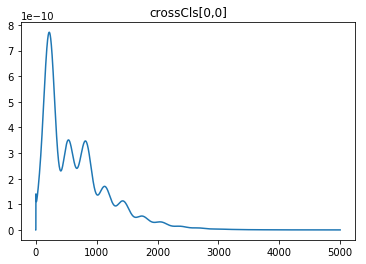

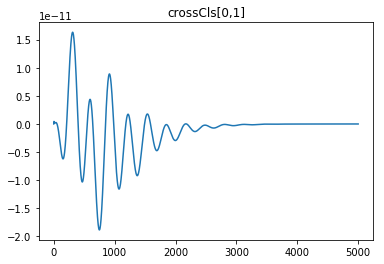

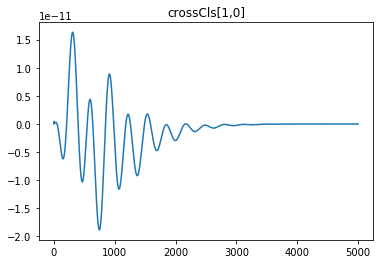

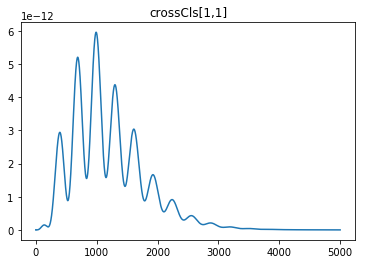

In [9]:
# plot a few
print crossCls.shape
print crossClsPlus.shape
print crossClsMinus.shape
for mapNum in range(nMaps):
    for mapNum2 in range(nMaps):
        plt.plot(ellsP,crossCls[mapNum,mapNum2])
        plt.title('crossCls[{0},{1}]'.format(mapNum,mapNum2))
        plt.show()

# Add Noise

In [10]:
print 'getting (primary CMB) detector noise...'
import noiseCl as ncl
# CMBS4 v1
fwhm = 1; ST = 1; SP = ST*1.414
ellsP = range(lmax+1)
noiseCMBS4_TT1 = ncl.noisePower(ST,ST,fwhm,ellsP)
#noiseCMBS4_TP1 = ncl.noisePower(ST,SP,fwhm,ellsP)
noiseCMBS4_PP1 = ncl.noisePower(SP,SP,fwhm,ellsP)

# set TE noise to zero
zerosList = np.zeros(lmax+1)
noiseCMBS4_TP1 = zerosList

# shape like crossCls
if nMaps == 2:
    noiseClsP = np.array([[noiseCMBS4_TT1,noiseCMBS4_TP1],[noiseCMBS4_TP1,noiseCMBS4_PP1]])
elif nMaps == 3:
    noiseClsP = np.array([[noiseCMBS4_TT1, noiseCMBS4_TP1,      zerosList],
                          [noiseCMBS4_TP1, noiseCMBS4_PP1,      zerosList],
                          [     zerosList,      zerosList, noiseCMBS4_PP1]])
else:
    'bad nMaps for noise maker'
    
print noiseClsP.shape

getting (primary CMB) detector noise...
(2, 2, 5001)


# Create Covariance Matrix

In [11]:
# make covariance matrices with noise
print 'building covariance matrix... '
covarP,invCovP,ellsP,obsListP = Fobj.makeCovar(crossCls,noiseClsP,0,lmax)

print invCovP.shape
print 'lmin = ',ellsP[0]
print 'obsList: ',obsListP

building covariance matrix... 
starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 
(3, 3, 5001)
lmin =  0
obsList:  [0. 1. 3.]


In [12]:
# save covar
# ell values go from 0 to lmax-1
#import pickle 
#pickle.dump(covarP,open('covar.pkl','w'))

# Calculate numerical derivatives

In [13]:
# get derivatives wrt parameters
print 'starting creation of C_l derivatives... '

dClVecs = np.empty((nCls, nCosParams, lmax+1))
for map1 in range(nMaps):
    print 'starting derivative set ',map1+1,' of ',nMaps,'... '
    for map2 in range(map1,nMaps):
        mapIdx  = map1*nMaps+map2 -map1*(map1+1)/2  
                                   # mapIdx = map index
        for pIdx in range(nCosParams):
            dClPlus  = crossClsPlus[map1,map2,pIdx]
            dClMinus = crossClsMinus[map1,map2,pIdx]
            dClVecs[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])


starting creation of C_l derivatives... 
starting derivative set  1  of  2 ... 
starting derivative set  2  of  2 ... 


# Build the Fisher matrix

In [14]:
#Build Fisher matrix
lmin = 50 #to match Allison et. al. and justify no ISW effect
#multply vectorT,invcov,vector and add up
print 'building Fisher matrix from components...'
print 'invCovP.shape: ',invCovP.shape,', dClVecs.shape: ',dClVecs.shape
Fij = np.zeros((nCosParams,nCosParams)) # indices match those in paramList
for i in range(nCosParams):
    print 'starting bin set ',i+1,' of ',nCosParams
    dClVec_i = dClVecs[:,i,:] # shape (nCls,nElls)
    for j in range(nCosParams):
        dClVec_j = dClVecs[:,j,:] # shape (nCls,nElls)
        # ugh.  don't like nested loops in Python... but easier to program...
        #for ell in range(lmin-2,lmax+51-2):
        for ell in range(lmin-2,lmax-2):
          myCov = invCovP[:,:,ell]  #note invCov has no ell=0,1 but dClVecs do
          fij = np.dot(dClVec_i[:,ell+2],np.dot(myCov,dClVec_j[:,ell+2]))
          Fij[i,j] += fij
    
print 'creation of Fisher Matrix complete!\n'

# Have a look at it
print 'Fij:'
print Fij
# check eigenvalues
w,v = np.linalg.eigh(np.linalg.inv(Fij))
print 'eigenvalues of F_ij^-1:'
print w

building Fisher matrix from components...
invCovP.shape:  (3, 3, 5001) , dClVecs.shape:  (3, 9, 5001)
starting bin set  1  of  9
starting bin set  2  of  9
starting bin set  3  of  9
starting bin set  4  of  9
starting bin set  5  of  9
starting bin set  6  of  9
starting bin set  7  of  9
starting bin set  8  of  9
starting bin set  9  of  9
creation of Fisher Matrix complete!

Fij:
[[ 1.06809052e+03 -7.62872322e+01 -5.27627453e+03  7.51889065e+09
  -3.50784740e+01 -3.16715408e+01  4.72660320e-02  3.81435706e-03
   7.66859440e-03]
 [-7.62872322e+01  8.36337252e+01  1.99625696e+03 -1.13217822e+10
   8.76194494e+00  4.80909906e+01 -1.89852397e-02 -2.16124659e-03
  -9.64160431e-03]
 [-5.27627453e+03  1.99625696e+03  7.50127011e+05 -4.12700263e+11
  -3.46578131e+02  1.75859003e+03  4.03310596e+00 -4.38360644e-02
  -3.77313766e-01]
 [ 7.51889065e+09 -1.13217822e+10 -4.12700263e+11  2.04221500e+18
  -1.77963987e+08 -8.68424855e+09  2.61967957e+06  3.15737710e+05
   1.71000361e+06]
 [-3.5078

# Save the results in an augmented Fisher Matrix object file

In [15]:
# Save these as part of Fobj.
# Is Fobj loaded?
Fobj.FijTE = Fij
Fobj.dClVecsP = dClVecs
Fobj.covarP = covarP
Fobj.invCovP = invCovP

Fobj.crossClsP      = crossCls
Fobj.crossClsPPlus  = crossClsPlus
Fobj.crossClsPMinus = crossClsMinus

Fobj.noiseClsP = noiseClsP

Fobj.ellsP = ellsP
Fobj.lminP = 0
Fobj.lmaxP = lmax  
Fobj.nMapsP = nMaps
Fobj.obsListP = obsListP


In [16]:
# save new Fobj
import pickle

filehandler = open('Fisher_7_6X2_w2_wan_TEB.obj','w') # accuracyBoost=3,doNorm=True,lmax=2000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate'; from FisherCl branch quickCl


pickle.dump(Fobj,filehandler)
filehandler.close()

print 'done'

done


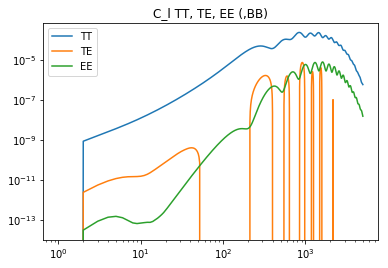

In [17]:
# just take a look at TT, TE, EE, BB
plt.loglog(ellsP,crossCls[0,0]*ellsP*(ellsP+1),label='TT')
#plt.loglog(ellsP,crossCls[0,1]*ellsP*(ellsP+1),label='ET')
plt.loglog(ellsP,crossCls[1,0]*ellsP*(ellsP+1),label='TE')
plt.loglog(ellsP,crossCls[1,1]*ellsP*(ellsP+1),label='EE')
if nMaps == 3 and myClName == 'total': # BB is zero for unlensed spectra
    plt.loglog(ellsP,crossCls[2,2]*ellsP*(ellsP+1),label='BB')
plt.title('C_l TT, TE, EE (,BB)')
plt.legend()
plt.show()

In [18]:
print dClVecs[:,:,3000+1:].shape

(3, 9, 2000)


# Check out these uncertainties!

In [19]:
getSigmas = lambda Fij: np.sqrt(np.diag(np.linalg.inv(Fij)))

In [26]:
myLmin = 30
FijTEB = Fobj.makeFisher(myLmin,TE=True)
Fijkg = Fobj.makeFisher(myLmin)
sigmasTEB = getSigmas(FijTEB)
sigmaskg = getSigmas(Fijkg)

print 'from TEB Fisher Matrix:'
for i,paramName in enumerate(paramList[:nCosParams]):
    print paramName, ': ',sigmasTEB[i]

adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lm

# Combine the Fisher matrices and see smaller sigmas

In [39]:
from prettytable import PrettyTable

print 'comparison of sigma(T,E), sigma(kappa,g), and sigma(T,E,kappa,g):\n'
FijSum = Fijkg.copy()
FijSum[:nCosParams,:nCosParams] += FijTEB

sigmasSum = getSigmas(FijSum)
#infSet = ['inf','inf','inf','inf','inf','inf'] # number of infs needs to be number of bins
infSet = [0,0,0,0,0,0] # number of infs needs to be number of bins
sigmasTEB = np.append(sigmasTEB,infSet)
sigmasSum = np.append(sigmasSum,infSet)
#print sigmasTEB
    
from prettytable import PrettyTable
# for a set of fsky values
for fsky in (1.0,0.75,0.4,0.25):
    fskyFac = np.sqrt(1./fsky)
    print fskyFac
    sigmasA = sigmaskg*fskyFac
    sigmasB = sigmasTEB*fskyFac
    sigmasC = sigmasSum*fskyFac
    t = PrettyTable(['Parameter', 'sigma(T,E)','sigma(k,g)','sigma(T,E,k,g)'])
    for i,p in enumerate(Fobj.paramList):
        t.add_row([p,"%5.3g" % sigmasB[i],"%5.3g" % sigmasA[i],"%5.3g" % sigmasC[i]])
    print 'fsky = {0}:'.format(fsky)
    print t

print 'which Cl used for T,E,B: ',myClName

comparison of sigma(T,E), sigma(kappa,g), and sigma(T,E,kappa,g):

1.0
fsky = 1.0:
+---------------+------------+------------+----------------+
|   Parameter   | sigma(T,E) | sigma(k,g) | sigma(T,E,k,g) |
+---------------+------------+------------+----------------+
|     ombh2     |   0.0668   |   0.0783   |     0.0261     |
|     omch2     |    0.67    |   0.253    |     0.0771     |
| cosmomc_theta |   0.019    |   0.0374   |    0.00123     |
|       As      |  1.14e-06  |  5.45e-09  |    1.86e-09    |
|       ns      |    1.91    |   0.656    |     0.137      |
|      tau      |     218    |     489    |     0.534      |
|      mnu      |     443    |    2.19    |      1.23      |
|       wa      |  1.15e+05  |    51.7    |      4.65      |
|       w       |  2.99e+05  |    21.7    |      3.62      |
|      bin1     |       0    |    1.82    |      1.46      |
|      bin2     |       0    |    1.84    |      1.49      |
|      bin3     |       0    |    2.39    |       2.1      |
| 

# Compare to Byeonghee's result

In [34]:
# Byeonghee's result:
# This used lmin 50, lmax 1000, halofit
sigmasB1 = {
    #sigma(b) (4 bins) =  [ 0.01220295  0.0092872   0.01058874  0.03529165]
    'cosmomc_theta' : 0.00015113283201,
    'ombh2' : 0.000504509008534,
    'omch2' : 0.00151341881388,
    'ns' : 0.00732594856064,
    'As' : 0.0618279762973*1e-9,
    'mnu' : 0.0564262366597,
    'w' : 0.088058950571,
    'tau' : 0.0595781322066,
    'bin1' : 0.01220295,
    'bin2' : 0.0092872,
    'bin3' : 0.01058874,
    'bin4' : 0.03529165
}
# This used lmin 50, lmax 1000, halofit, bias by bin
sigmasB2 = {
    'cosmomc_theta' : 7.31905124578e-05,
    'ombh2' : 0.00117829505232,
    'omch2' : 0.00253188668652,
    'ns' : 0.0107531686379,
    'As' : 0.0836156981509*1e-9,
    'mnu' : 0.110362820478,
    'w' : 0.0933472979446,
    'tau' : 8.65882116522,
    'bin1' : 0.01120403,
    'bin2' : 0.0123868,
    'bin3' : 0.01398429,
    'bin4' : 0.0143556
}
# This one was after a late fix Byeonghee did:
"""
+---------------+--------------+--------------+
|   Parameter   | sigma_Z(k,g) | sigma_B(k,g) | 
+---------------+--------------+--------------+
|     ombh2     |   0.00182    |   0.00118    |    
|     omch2     |   0.00509    |   0.00253    |     
| cosmomc_theta |   6.51e-05   |   7.58e-05   |     
|       As      |   9.26e-11   |   1.29e-10   |     
|       ns      |    0.0116    |    0.0190    |    
|      tau      |     0.33     |     8.26     |    
|      mnu      |    0.0884    |     0.11     |      
|       w       |    0.0448    |    0.0411    |       
|      bin1     |    0.011     |    0.0063    |      
|      bin2     |    0.0141    |    0.0056    |    
|      bin3     |    0.0195    |    0.0054    |     
|      bin4     |    0.0236    |    0.0047    |
+---------------+--------------+--------------+"""
sigmasB3 = {
    'cosmomc_theta' : 7.58e-05,
    'ombh2' : 0.00118,
    'omch2' : 0.00253,
    'ns' : 0.0190,
    'As' : 1.29e-10,
    'mnu' : 0.11,
    'w' : 0.0411,
    'tau' : 8.26,
    'bin1' : 0.0063,
    'bin2' : 0.0056,
    'bin3' : 0.0054,
    'bin4' : 0.0047
}


sigmasB = sigmasB3

print paramList


['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa']


In [35]:
"""
# remove tau from my Fisher matrix, since Byeonghee omitted it.
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)
Fij3 = fixParam(Fij2,5) # 5 for neutrinos
sigmas3 = np.sqrt(np.diag(np.linalg.inv(Fij3)))
sigmas3 = np.insert(sigmas3,5,0)
print sigmas3
"""

'\n# remove tau from my Fisher matrix, since Byeonghee omitted it.\n# define row,col deleting function\ndef fixParam(Fij,pNum):\n    return np.delete(np.delete(Fij,pNum,0),pNum,1)\nFij3 = fixParam(Fij2,5) # 5 for neutrinos\nsigmas3 = np.sqrt(np.diag(np.linalg.inv(Fij3)))\nsigmas3 = np.insert(sigmas3,5,0)\nprint sigmas3\n'

In [36]:
"""
# convert sigma_bi to sigma_bi/fid_bi
fidBs = Fobj.binBs
print 'fiducial B_i: ',fidBs
sigmas3[-4:] = sigmas3[-4:]/fidBs
print sigmas3
"""

"\n# convert sigma_bi to sigma_bi/fid_bi\nfidBs = Fobj.binBs\nprint 'fiducial B_i: ',fidBs\nsigmas3[-4:] = sigmas3[-4:]/fidBs\nprint sigmas3\n"

In [37]:
"""
#paramList = ['ombh2','omch2','cosmomc_theta','As','ns','tau','mnu']
mask = [True,True,False,True,True,False,True, True,True,True,True]
paramListB = np.array(paramList)
paramListB = np.append(paramListB,['bin1','bin2','bin3','bin4'])
paramListB = paramListB[mask]
sigmasB = sigmas3[mask]
print sigmas3
print sigmasB
print paramListB
print lmin
"""

"\n#paramList = ['ombh2','omch2','cosmomc_theta','As','ns','tau','mnu']\nmask = [True,True,False,True,True,False,True, True,True,True,True]\nparamListB = np.array(paramList)\nparamListB = np.append(paramListB,['bin1','bin2','bin3','bin4'])\nparamListB = paramListB[mask]\nsigmasB = sigmas3[mask]\nprint sigmas3\nprint sigmasB\nprint paramListB\nprint lmin\n"

In [38]:
from prettytable import PrettyTable
t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmasB[i]
    Bi = Bsigmas[paramList[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

KeyError: 0